In [1]:
import xarray as xr
from thesis_toolbox.utils import calc_spatial_correlations
from thesis_toolbox.plot.tools import map_large_scale
from thesis_toolbox.plot.plot_correlation_map import plot_large_scale_correlation_map
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from functools import partial
%matplotlib inline

In [2]:
path = '../../data/data/downloads/'

ds = xr.open_dataset(path+'intermediate_results/era5.single_level.soil_temperature_level_1.MAM.1979-2019.nc')
df = pd.read_csv('../../data/data/results/timeseries_table.csv', index_col=0)

da = xr.DataArray(df['AO EOF DJF'],dims='time')

ds = ds.sel(time=slice('1999',None))

ds = ds.assign_coords(time=da.time)

r, p = calc_spatial_correlations(ds['stl1'].coarsen(longitude=4,latitude=2, boundary='pad').mean(), da)

Text(0.5, 1.0, 'ERA5 upper soil temperature correlated with winter AO')

/opt/conda/envs/dust/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


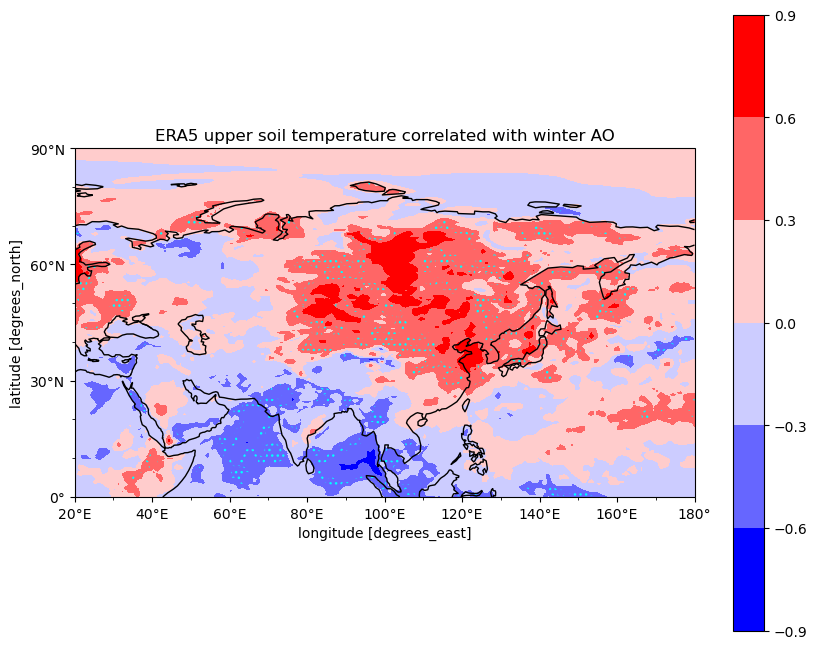

In [3]:
plot_large_scale_correlation_map(r,p_vals=p, contourf=True)
ax = plt.gca()
ax.set_title('ERA5 upper soil temperature correlated with winter AO')

Text(0.5, 1.0, 'ERA5 upper soil temperature correlated with total emissions')

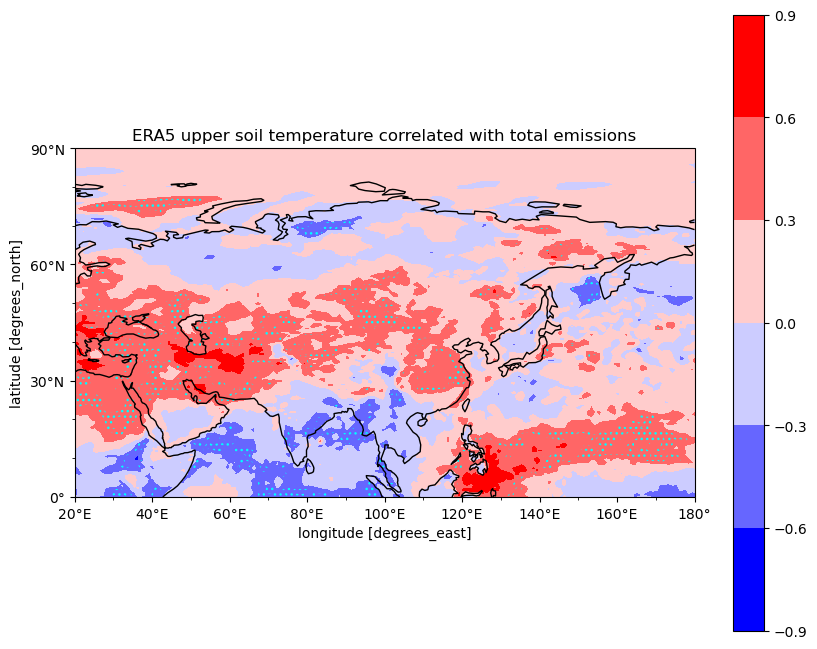

In [4]:
da = xr.DataArray(df['Total'],dims='time')
r, p = calc_spatial_correlations(ds['stl1'].coarsen(longitude=4,latitude=2, boundary='pad').mean(), da)
plot_large_scale_correlation_map(r,p_vals=p,contourf=True)
ax = plt.gca()
ax.set_title('ERA5 upper soil temperature correlated with total emissions')